In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold 
from sklearn.metrics import mean_squared_error

In [247]:
dataset = pd.read_csv("sgemm_product.csv")
dataset.shape

(241600, 18)

In [249]:
dataset['AverageRun'] = dataset[['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)']].mean(axis = 1)

In [250]:
dataset['AverageRun'].describe()

count    241600.000000
mean        217.571953
std         368.750161
min          13.317500
25%          40.667500
50%          69.790000
75%         228.387500
max        3341.507500
Name: AverageRun, dtype: float64

In [251]:
def scale_columns(dataframe):
    dfSubmean = dataframe - dataframe.mean()
    return dfSubmean / dataframe.std()

In [252]:
x = scale_columns(dataset[['MWG','NWG','KWG','MDIMC','NDIMC','MDIMA','NDIMB','KWI','VWM','VWN']])
x[['STRM','STRN','SA','SB']] = dataset[['STRM','STRN','SA','SB']]
x.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB
0,-1.516754,-1.516754,-1.210995,-0.753892,-0.753892,-0.998052,-0.998052,-0.999998,-0.741447,-0.741447,0,0,0,0
1,-1.516754,-1.516754,-1.210995,-0.753892,-0.753892,-0.998052,-0.998052,-0.999998,-0.741447,-0.741447,0,0,0,1
2,-1.516754,-1.516754,-1.210995,-0.753892,-0.753892,-0.998052,-0.998052,-0.999998,-0.741447,-0.741447,0,0,1,0
3,-1.516754,-1.516754,-1.210995,-0.753892,-0.753892,-0.998052,-0.998052,-0.999998,-0.741447,-0.741447,0,0,1,1
4,-1.516754,-1.516754,-1.210995,-0.753892,-0.753892,-0.998052,-0.998052,-0.999998,-0.741447,-0.741447,0,1,0,0


In [253]:
dataset['AverageRun'].median()

69.79

In [254]:
def isGreaterThanMedian(x, median):
    if x > median:
        return 1
    return 0

In [255]:
median = dataset['AverageRun'].median()
target = dataset['AverageRun'].apply(isGreaterThanMedian, args = (median,))

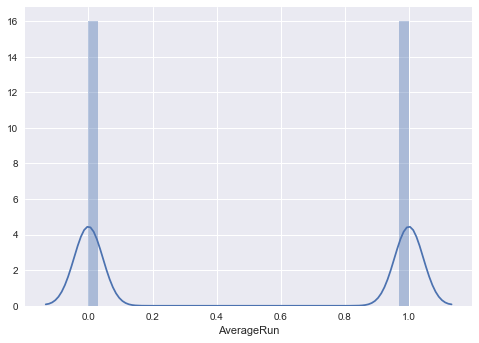

In [258]:
sns.distplot(target)

In [259]:
from keras.utils import to_categorical
y = np.array(target)
y = to_categorical(y)
y.shape

(241600, 2)

In [260]:
x = np.array(x)
x

array([[-1.51675411, -1.51675411, -1.21099469, ...,  0.        ,
         0.        ,  0.        ],
       [-1.51675411, -1.51675411, -1.21099469, ...,  0.        ,
         0.        ,  1.        ],
       [-1.51675411, -1.51675411, -1.21099469, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.12044995,  1.12044995,  0.82576403, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.12044995,  1.12044995,  0.82576403, ...,  1.        ,
         1.        ,  0.        ],
       [ 1.12044995,  1.12044995,  0.82576403, ...,  1.        ,
         1.        ,  1.        ]])

In [261]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
model = Sequential()
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['acc'])

In [262]:
test_size_list = [0.99,0.90,0.8,0.7,0.6,0.4,0.3]
training_set_size=[]
train_acc=[]
test_acc=[]
for test_size in test_size_list:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= test_size, random_state=123)
    model.fit(x_train,y_train,epochs=5,batch_size=128)
    train_acc.append(model.evaluate(x_train,y_train,batch_size=128)[1])
    test_acc.append(model.evaluate(x_test,y_test,batch_size=128)[1])
    training_set_size.append(len(x_train))

Epoch 1/5
2416/2416 [==============================] - 1s 239us/step - loss: 0.7083 - acc: 0.5168
Epoch 2/5
2416/2416 [==============================] - 0s 30us/step - loss: 0.7005 - acc: 0.5068
Epoch 3/5
2416/2416 [==============================] - 0s 30us/step - loss: 0.6976 - acc: 0.4967
Epoch 4/5
2416/2416 [==============================] - 0s 30us/step - loss: 0.6956 - acc: 0.5035
Epoch 5/5
239184/239184 [==============================] - 4s 16us/step
Epoch 1/5
24160/24160 [==============================] - 1s 24us/step - loss: 0.6847 - acc: 0.5726
Epoch 2/5
24160/24160 [==============================] - 1s 24us/step - loss: 0.6692 - acc: 0.6569
Epoch 3/5
24160/24160 [==============================] - 1s 23us/step - loss: 0.6550 - acc: 0.7216
Epoch 4/5
24160/24160 [==============================] - 1s 24us/step - loss: 0.6417 - acc: 0.7588
Epoch 5/5
217440/217440 [==============================] - 3s 16us/step
Epoch 1/5
48320/48320 [==============================] - 1s 24us/step -

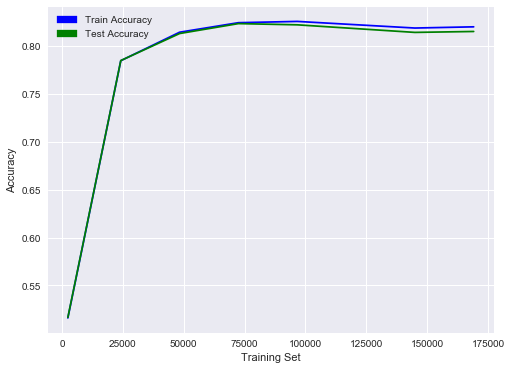

In [263]:
import matplotlib.patches as mpatches
plt.figure(figsize=(8,6))
plt.style.use('seaborn')
plt.plot(training_set_size, train_acc, color = "blue") 
plt.plot(training_set_size, test_acc, color = "green") 
plt.xlabel("Training Set") 
plt.ylabel("Accuracy")
trainlegend = mpatches.Patch(color='blue', label='Train Accuracy')
testlegend = mpatches.Patch(color='green', label='Test Accuracy')
plt.legend([trainlegend, testlegend], ['Train Accuracy', 'Test Accuracy'])
plt.show() 

In [264]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state=123)
val_acc = []
kf = KFold(n_splits=5)
for train_index, val_index in kf.split(X_train):
    model.fit(X_train[train_index], y_train[train_index],epochs=2,batch_size=128)
    val_acc.append(model.evaluate(X_train[val_index],y_train[val_index],batch_size=128)[1])
accuracy = sum(val_acc)/len(val_acc)*100
print("The accuracy of the neural net with sigmoid activation function is {0:.2f}%".format(accuracy))

Epoch 1/2
173952/173952 [==============================] - 4s 23us/step - loss: 0.4546 - acc: 0.8186
Epoch 2/2
43488/43488 [==============================] - 1s 19us/step
Epoch 1/2
173952/173952 [==============================] - 5s 27us/step - loss: 0.4505 - acc: 0.8190
Epoch 2/2
43488/43488 [==============================] - 1s 15us/step
Epoch 1/2
173952/173952 [==============================] - 4s 24us/step - loss: 0.4454 - acc: 0.8199
Epoch 2/2
43488/43488 [==============================] - 1s 16us/step
Epoch 1/2
173952/173952 [==============================] - 4s 24us/step - loss: 0.4382 - acc: 0.8224
Epoch 2/2
43488/43488 [==============================] - 1s 15us/step
Epoch 1/2
173952/173952 [==============================] - 4s 24us/step - loss: 0.4296 - acc: 0.8250: 1s - 
Epoch 2/2
43488/43488 [==============================] - 1s 17us/step
The accuracy of the neural net with sigmoid activation function is 82.24%


In [265]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
model = Sequential()
model.add(Dense(128, activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['acc'])

In [266]:
test_size_list = [0.99,0.90,0.8,0.7,0.6,0.4,0.3]
training_set_size=[]
train_acc=[]
test_acc=[]
for test_size in test_size_list:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= test_size, random_state=123)
    model.fit(x_train,y_train,epochs=5,batch_size=128)
    train_acc.append(model.evaluate(x_train,y_train,batch_size=128)[1])
    test_acc.append(model.evaluate(x_test,y_test,batch_size=128)[1])
    training_set_size.append(len(x_train))

Epoch 1/5
2416/2416 [==============================] - 1s 241us/step - loss: 2.9521 - acc: 0.4646
Epoch 2/5
2416/2416 [==============================] - 0s 34us/step - loss: 2.4355 - acc: 0.5126
Epoch 3/5
2416/2416 [==============================] - 0s 32us/step - loss: 2.1769 - acc: 0.5503
Epoch 4/5
2416/2416 [==============================] - 0s 37us/step - loss: 1.9176 - acc: 0.5940
Epoch 5/5
239184/239184 [==============================] - 4s 17us/step
Epoch 1/5
24160/24160 [==============================] - 1s 27us/step - loss: 1.2447 - acc: 0.6630
Epoch 2/5
24160/24160 [==============================] - 1s 26us/step - loss: 0.8840 - acc: 0.6935
Epoch 3/5
24160/24160 [==============================] - 1s 25us/step - loss: 0.8053 - acc: 0.7386
Epoch 4/5
24160/24160 [==============================] - 1s 26us/step - loss: 0.9884 - acc: 0.6927
Epoch 5/5
217440/217440 [==============================] - 4s 17us/step
Epoch 1/5
48320/48320 [==============================] - 1s 27us/step -

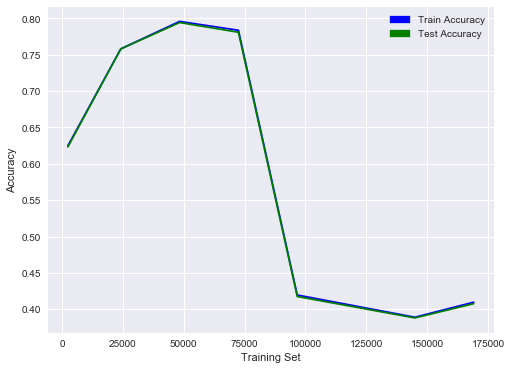

In [267]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn')
plt.plot(training_set_size, train_acc, color = "blue") 
plt.plot(training_set_size, test_acc, color = "green") 
plt.xlabel("Training Set") 
plt.ylabel("Accuracy")
trainlegend = mpatches.Patch(color='blue', label='Train Accuracy')
testlegend = mpatches.Patch(color='green', label='Test Accuracy')
plt.legend([trainlegend, testlegend], ['Train Accuracy', 'Test Accuracy'])
plt.show() 

In [268]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state=123)
val_acc = []
kf = KFold(n_splits=5)
for train_index, val_index in kf.split(X_train):
    model.fit(X_train[train_index], y_train[train_index],epochs=2,batch_size=128)
    val_acc.append(model.evaluate(X_train[val_index],y_train[val_index],batch_size=128)[1])
accuracy = sum(val_acc)/len(val_acc)*100
print("The accuracy of the neural net with Tanh activation function is {0:.2f}%".format(accuracy))

Epoch 1/2
173952/173952 [==============================] - 4s 25us/step - loss: 3.9742 - acc: 0.4093
Epoch 2/2
43488/43488 [==============================] - 1s 16us/step
Epoch 1/2
173952/173952 [==============================] - 4s 26us/step - loss: 4.2157 - acc: 0.4132
Epoch 2/2
43488/43488 [==============================] - 1s 17us/step
Epoch 1/2
173952/173952 [==============================] - 4s 25us/step - loss: 4.0935 - acc: 0.4052
Epoch 2/2
43488/43488 [==============================] - 1s 16us/step
Epoch 1/2
173952/173952 [==============================] - 4s 24us/step - loss: 3.9629 - acc: 0.4049
Epoch 2/2
43488/43488 [==============================] - 1s 17us/step
Epoch 1/2
173952/173952 [==============================] - 4s 24us/step - loss: 2.7847 - acc: 0.4326
Epoch 2/2
43488/43488 [==============================] - 1s 16us/step
The accuracy of the neural net with Tanh activation function is 41.90%


In [269]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='relu'))
model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['acc'])

In [270]:
test_size_list = [0.99,0.90,0.8,0.7,0.6,0.4,0.3]
training_set_size=[]
train_acc=[]
test_acc=[]
for test_size in test_size_list:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= test_size, random_state=123)
    model.fit(x_train,y_train,epochs=5,batch_size=128)
    train_acc.append(model.evaluate(x_train,y_train,batch_size=128)[1])
    test_acc.append(model.evaluate(x_test,y_test,batch_size=128)[1])
    training_set_size.append(len(x_train))

Epoch 1/5
2416/2416 [==============================] - 1s 234us/step - loss: 1.4933 - acc: 0.5969
Epoch 2/5
2416/2416 [==============================] - 0s 31us/step - loss: 0.7026 - acc: 0.6672
Epoch 3/5
2416/2416 [==============================] - 0s 35us/step - loss: 2.0023 - acc: 0.6562
Epoch 4/5
2416/2416 [==============================] - 0s 30us/step - loss: 2.6693 - acc: 0.6279
Epoch 5/5
239184/239184 [==============================] - 4s 17us/step
Epoch 1/5
24160/24160 [==============================] - 1s 27us/step - loss: 1.4431 - acc: 0.6680
Epoch 2/5
24160/24160 [==============================] - 1s 28us/step - loss: 0.8143 - acc: 0.7382
Epoch 3/5
24160/24160 [==============================] - 1s 26us/step - loss: 0.4739 - acc: 0.7696
Epoch 4/5
24160/24160 [==============================] - 1s 25us/step - loss: 0.3742 - acc: 0.8019
Epoch 5/5
217440/217440 [==============================] - 4s 17us/step
Epoch 1/5
48320/48320 [==============================] - 1s 27us/step -

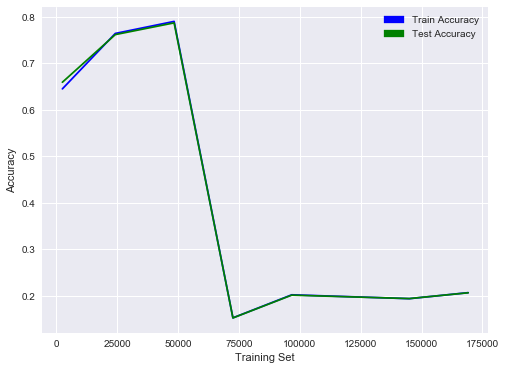

In [271]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn')
plt.plot(training_set_size, train_acc, color = "blue") 
plt.plot(training_set_size, test_acc, color = "green") 
plt.xlabel("Training Set") 
plt.ylabel("Accuracy")
trainlegend = mpatches.Patch(color='blue', label='Train Accuracy')
testlegend = mpatches.Patch(color='green', label='Test Accuracy')
plt.legend([trainlegend, testlegend], ['Train Accuracy', 'Test Accuracy'])
plt.show() 

In [272]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state=123)
val_acc = []
kf = KFold(n_splits=5)
for train_index, val_index in kf.split(X_train):
    model.fit(X_train[train_index], y_train[train_index],epochs=2,batch_size=128)
    val_acc.append(model.evaluate(X_train[val_index],y_train[val_index],batch_size=128)[1])
accuracy = sum(val_acc)/len(val_acc)*100
print("The accuracy of the neural net with Relu activation function is {0:.2f}%".format(accuracy))

Epoch 1/2
173952/173952 [==============================] - 5s 26us/step - loss: 5.8186 - acc: 0.2019
Epoch 2/2
43488/43488 [==============================] - 1s 21us/step
Epoch 1/2
173952/173952 [==============================] - 4s 25us/step - loss: 5.1914 - acc: 0.1943
Epoch 2/2
43488/43488 [==============================] - 1s 17us/step
Epoch 1/2
173952/173952 [==============================] - 4s 25us/step - loss: 5.0284 - acc: 0.1944
Epoch 2/2
43488/43488 [==============================] - 1s 23us/step
Epoch 1/2
173952/173952 [==============================] - 5s 26us/step - loss: 4.9175 - acc: 0.1888
Epoch 2/2
43488/43488 [==============================] - 1s 17us/step
Epoch 1/2
173952/173952 [==============================] - 5s 27us/step - loss: 4.8871 - acc: 0.1881
Epoch 2/2
43488/43488 [==============================] - 1s 20us/step
The accuracy of the neural net with Relu activation function is 19.11%


In [273]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=123)
nodes_list=[8,16,32,64,128,256]
train_acc = []
test_acc = []
model = Sequential()
for i in nodes_list:
    model.add(Dense(i, activation='sigmoid'))
    model.add(Dense(2, activation='sigmoid'))
    model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['acc'])
    model.fit(x_train,y_train,epochs=5)
    train_acc.append(model.evaluate(x_train,y_train)[1])
    test_acc.append(model.evaluate(x_test,y_test)[1])

Epoch 1/5
169120/169120 [==============================] - 14s 84us/step - loss: 0.5944 - acc: 0.7253
Epoch 2/5
169120/169120 [==============================] - 14s 81us/step - loss: 0.4583 - acc: 0.8253
Epoch 3/5
169120/169120 [==============================] - 13s 77us/step - loss: 0.4182 - acc: 0.8397
Epoch 4/5
169120/169120 [==============================] - 13s 79us/step - loss: 0.3989 - acc: 0.8447
Epoch 5/5
72480/72480 [==============================] - 4s 60us/step
Epoch 1/5
169120/169120 [==============================] - 21s 126us/step - loss: 0.6034 - acc: 0.8044
Epoch 2/5
169120/169120 [==============================] - 18s 104us/step - loss: 0.4009 - acc: 0.8515
Epoch 3/5
169120/169120 [==============================] - 14s 85us/step - loss: 0.3577 - acc: 0.8528
Epoch 4/5
169120/169120 [==============================] - 16s 92us/step - loss: 0.3456 - acc: 0.8559
Epoch 5/5
72480/72480 [==============================] - 4s 57us/step
Epoch 1/5
169120/169120 [=================

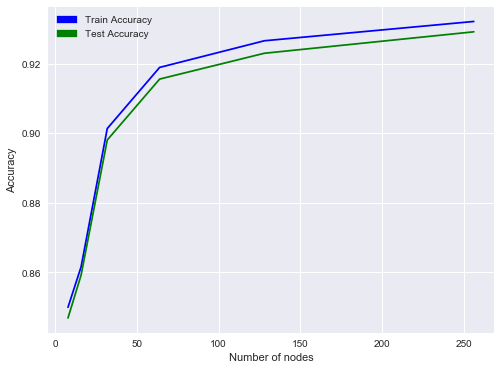

In [274]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn')
plt.plot(nodes_list, train_acc, color = "blue") 
plt.plot(nodes_list, test_acc, color = "green") 
plt.xlabel("Number of nodes") 
plt.ylabel("Accuracy")
trainlegend = mpatches.Patch(color='blue', label='Train Accuracy')
testlegend = mpatches.Patch(color='green', label='Test Accuracy')
plt.legend([trainlegend, testlegend], ['Train Accuracy', 'Test Accuracy'])
plt.show() 

In [275]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=123)
layers_list=[1,2,3,4,5]
train_acc = []
test_acc = []
for i in layers_list:
    model = Sequential()
    for l in range(i):
        model.add(Dense(128, activation='sigmoid'))
    model.add(Dense(2, activation='sigmoid'))
    model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['acc'])
    model.fit(x_train,y_train,epochs=5)
    train_acc.append(model.evaluate(x_train,y_train)[1])
    test_acc.append(model.evaluate(x_test,y_test)[1])

Epoch 1/5
169120/169120 [==============================] - 15s 91us/step - loss: 0.5583 - acc: 0.7737 
Epoch 2/5
169120/169120 [==============================] - ETA: 0s - loss: 0.4778 - acc: 0.821 - 15s 88us/step - loss: 0.4779 - acc: 0.8216
Epoch 3/5
169120/169120 [==============================] - 15s 90us/step - loss: 0.4674 - acc: 0.8185
Epoch 4/5
169120/169120 [==============================] - 15s 89us/step - loss: 0.4614 - acc: 0.8171
Epoch 5/5
72480/72480 [==============================] - 4s 60us/step
Epoch 1/5
169120/169120 [==============================] - 20s 116us/step - loss: 0.6551 - acc: 0.6996
Epoch 2/5
169120/169120 [==============================] - 19s 111us/step - loss: 0.5165 - acc: 0.8080
Epoch 3/5
169120/169120 [==============================] - 19s 110us/step - loss: 0.4632 - acc: 0.8260
Epoch 4/5
169120/169120 [==============================] - 20s 115us/step - loss: 0.4480 - acc: 0.8275
Epoch 5/5
72480/72480 [==============================] - 5s 75us/step
E

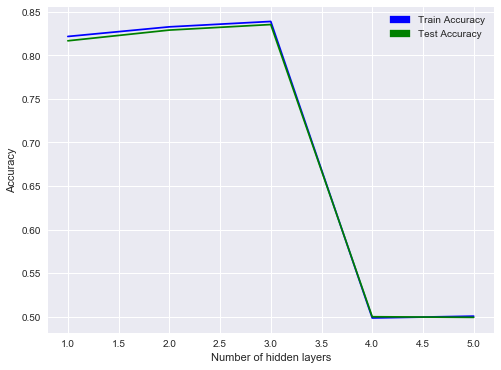

In [276]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn')
plt.plot(layers_list, train_acc, color = "blue") 
plt.plot(layers_list, test_acc, color = "green") 
plt.xlabel("Number of hidden layers") 
plt.ylabel("Accuracy")
trainlegend = mpatches.Patch(color='blue', label='Train Accuracy')
testlegend = mpatches.Patch(color='green', label='Test Accuracy')
plt.legend([trainlegend, testlegend], ['Train Accuracy', 'Test Accuracy'])
plt.show() 

In [283]:
from sklearn.neighbors import KNeighborsClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=123)
neighbours_list=[1,2,3,4,5,7,10,15]
train_acc = []
test_acc = []
for i in neighbours_list:
    knnmodel = KNeighborsClassifier(n_neighbors=i)
    knnmodel.fit(x_train,y_train)
    train_acc.append(knnmodel.score(x_train,y_train))
    test_acc.append(knnmodel.score(x_test,y_test))

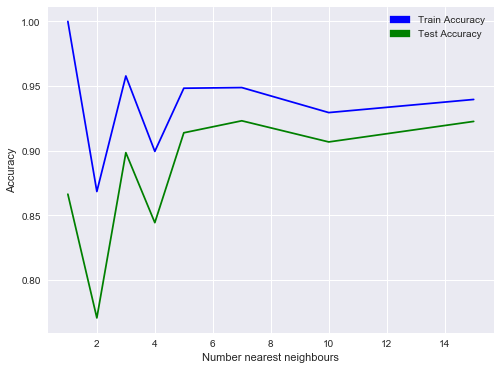

In [284]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn')
plt.plot(neighbours_list, train_acc, color = "blue") 
plt.plot(neighbours_list, test_acc, color = "green") 
plt.xlabel("Number nearest neighbours") 
plt.ylabel("Accuracy")
trainlegend = mpatches.Patch(color='blue', label='Train Accuracy')
testlegend = mpatches.Patch(color='green', label='Test Accuracy')
plt.legend([trainlegend, testlegend], ['Train Accuracy', 'Test Accuracy'])
plt.show() 